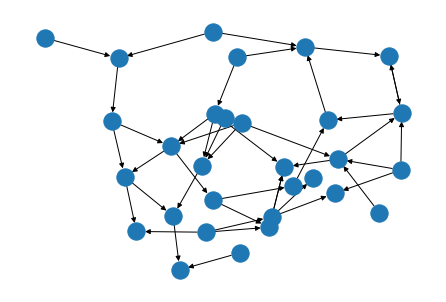

In [1]:
import networkx as nx
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))


In [3]:
nx.pagerank(g)

{0: 0.013219148507568473,
 1: 0.04305614905051308,
 2: 0.022418442238567305,
 3: 0.020763573555365067,
 4: 0.15194090000926444,
 5: 0.015278038556628359,
 6: 0.0435719907662455,
 7: 0.08868962006965002,
 8: 0.009276594051426116,
 9: 0.0272152235733787,
 10: 0.009276594051426116,
 11: 0.009276594051426116,
 12: 0.009276594051426116,
 13: 0.021104257419853188,
 14: 0.02353550008408596,
 15: 0.009276594051426116,
 16: 0.01813520391793683,
 17: 0.009276594051426116,
 18: 0.012649668919200122,
 19: 0.05375946044542633,
 20: 0.009276594051426116,
 21: 0.011904963688854353,
 22: 0.15057445865003966,
 23: 0.020843771954589734,
 24: 0.025679331302227968,
 25: 0.027216869246589045,
 26: 0.0925438315518033,
 27: 0.009276594051426116,
 28: 0.009276594051426116,
 29: 0.03241025002937753}

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

def pagerank(g, alpha = 0.85, n = 1000):
    node = random.choice(list(g.nodes))
    results = []
    
    for i in range(n):
        if random.uniform(0,1) < alpha:
            neighbors = list(g.neighbors(node))
            if not neighbors:
                node = random.choice(list(g.nodes))
            else:
                node = random.choice(neighbors)
        else:
            node = random.choice(list(g.nodes))
        results.append(node)
    
    visits = Counter(results)
    
    for i in visits.keys():
        visits[i] /= len(results)
    return visits

In [29]:
pagerank(g)

Counter({26: 0.088,
         4: 0.144,
         22: 0.148,
         7: 0.094,
         17: 0.009,
         5: 0.016,
         25: 0.029,
         29: 0.035,
         24: 0.028,
         23: 0.025,
         16: 0.019,
         21: 0.016,
         19: 0.046,
         6: 0.051,
         12: 0.008,
         13: 0.018,
         9: 0.028,
         11: 0.008,
         8: 0.01,
         0: 0.01,
         27: 0.011,
         14: 0.027,
         1: 0.039,
         3: 0.025,
         2: 0.021,
         20: 0.006,
         28: 0.009,
         15: 0.01,
         18: 0.016,
         10: 0.006})

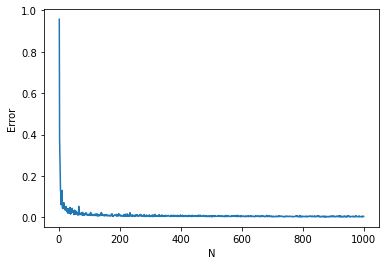

In [50]:
errors = []
trials = np.arange(1,1001)

for i in trials:
    simulation = pagerank(g, n = i)
    library = nx.pagerank(g)
    total_error = 0
    
    for j in simulation:
        total_error += abs(simulation[j] - library[j])
    errors.append(total_error/len(simulation))
    
plt.plot(trials, errors)
plt.xlabel("N")
plt.ylabel("Error")
plt.show()
